# K-neighbours Regression
사례 기반 학습

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'weight')

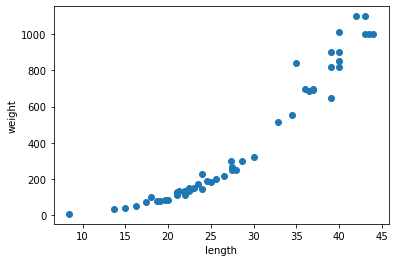

In [4]:
plt.scatter(perch_length, perch_weight) #  길이와 무게의 비례관계
plt.xlabel('length')
plt.ylabel('weight')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# 사이킷런의 훈련셋은 2차원 리스트여야 함
train_input.ndim, test_input.ndim
# 현재는 1차원 리스트

(1, 1)

In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.ndim, test_input.ndim

(2, 2)

## 결정 계수 $$R^2 = 1 - {(\text{target} - \text{pred})^2 \over (\text{target} - \text{mean})^2} $$

타깃의 평균 정도를 예측하는 수준이라면, 분자와 문모가 비슷해져 결정계수는 0에 가까워지고  
카깃이 예측에 가주 가까워지면 분모가 0에 가까워지기 때문에 1에 가까운 값이 된다.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [10]:
knr

KNeighborsRegressor()

In [11]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [12]:
knr.score(test_input, test_target)
# 회귀는 정확한 숫자 예측이 불가능 : 예측값과 타깃 모두 임의의 수치이므로

0.992809406101064

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
test_pred = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_pred)
mae # 예측이 평균적으로 19g 정도 타깃값과 다름을 나타낸다. 

19.157142857142862

In [16]:
knr = KNeighborsRegressor(n_neighbors = 3)

In [17]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

- 과대적합 Overfitting : 트레인 셋 스코어 > 테스트 셋 스코어

- 과소적합 Underfitting : 트레인 셋 스코어 < 테스트 셋 스코어 or 두 점수 모두 낮은 경우
    - 원인 : 트레인, 테스트 셋의 크기가 매우 작은 경우
    
>해결 - 모델 복잡도를 증가시킨다

### KNeighbors 모델 복잡도 증가 방법
1. k 감소 ( default = 5 )  : 트레인 셋의 국지적 패턴에 민감해짐
2. k 증가 : 데이터 전반에 있는 일반적 패턴을 따름

In [19]:
knr.predict([[50]])

array([1033.33333333])

In [20]:
dist, idx = knr.kneighbors([[50]])

Text(0, 0.5, 'weight')

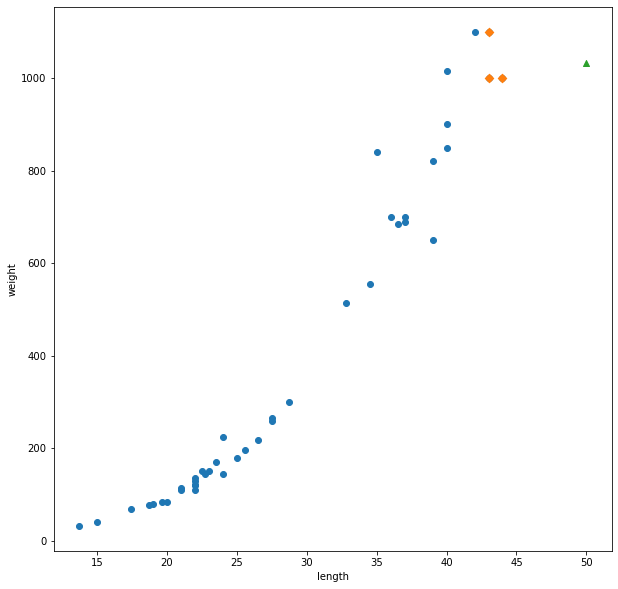

In [21]:
plt.figure(figsize=(10, 10))

plt.scatter(train_input, train_target)
plt.scatter(train_input[idx], train_target[idx], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [26]:
train_input[idx], np.mean(train_target[idx]) # 예측값과 일치함 > 45cm bream 무게로 예측

(array([[[44.],
         [43.],
         [43.]]]),
 1033.3333333333333)

Text(0, 0.5, 'weight')

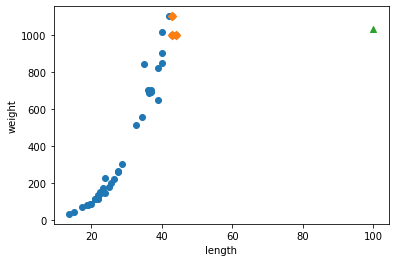

In [30]:
dist, idx = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[idx], train_target[idx], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

# bream 크기가 커져도 무게가 증가하지 않는 문제 

# Linear Regression 
선형 회귀

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(train_input, train_target)

LinearRegression()

In [33]:
lr.predict([[50]])

array([1241.83860323])

In [39]:
a = lr.predict([[50]])

In [35]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

Text(0, 0.5, 'weight')

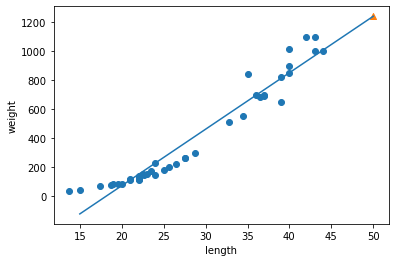

In [42]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, a[0], marker='^')
plt.xlabel('length')
plt.ylabel('weight')

### 결정계수 확인

In [43]:
lr.score(train_input, train_target), lr.score(test_input, test_target)

(0.939846333997604, 0.8247503123313558)

# Polynomial Regression 
다항 회귀

In [50]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [51]:
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [52]:
lr.fit(train_poly, train_target)

LinearRegression()

In [53]:
lr.predict([[50 **2, 50]])

array([1573.98423528])

In [55]:
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

In [62]:
lr.coef_[0], lr.coef_[1], lr.intercept_

(1.0143321093767301, -21.557924978837352, 116.0502107827827)

Text(0, 0.5, 'weight')

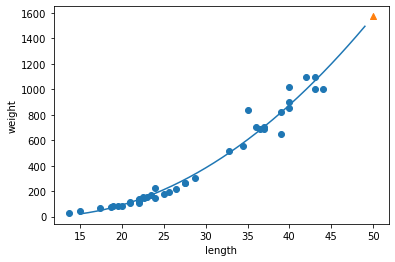

In [66]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)

plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)

plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')

# 다중 회귀
여러 개의 특성을 사용해 선형 회귀를 수행하는 것!

In [68]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.shape

(56, 3)

In [72]:
perch_full = df.to_numpy()
perch_full.shape

(56, 3)

In [73]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [74]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
poly = PolynomialFeatures()

In [77]:
poly.fit([[2, 3]])

PolynomialFeatures()

In [80]:
poly.transform([[2, 3]])
# 2와 3을 각 제곱한 4와 9가 추가됨
# 2와 3을 곱한 6이 추가됨
# 절편 1

array([[1., 2., 3., 4., 6., 9.]])

In [81]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [82]:
poly.fit(train_input)

PolynomialFeatures(include_bias=False)

In [83]:
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [85]:
train_poly[0]

array([ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
        26.4196,  15.6256,   9.2416])

In [86]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [87]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

In [88]:
lr.fit(train_poly, train_target)

LinearRegression()

In [89]:
lr.score(train_poly, train_target)

0.9903183436982124

In [90]:
lr.score(test_poly, test_target) # 과소적합 없음

0.9714559911594134

In [91]:
# 특성 추가 > 고차항의 최대 차수 지정 ! 5제곱까지의 특성을 만들어 출력함.
poly = PolynomialFeatures(degree=5, include_bias=False)

In [92]:
poly.fit(train_input)

PolynomialFeatures(degree=5, include_bias=False)

In [93]:
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape, test_poly.shape

((42, 55), (14, 55))

In [94]:
lr.fit(train_poly, train_target)

LinearRegression()

In [96]:
lr.score(train_poly, train_target), lr.score(test_poly, test_target)
# 트레인셋에 과대적합

(0.9999999999991097, -144.40579242684848)

# Regularisation 규제 
모델이 트레인셋에 과대적합되지 않도록 만듦
- 선형회귀모델 > 특성에 곱해지는 계수(기울기) 크기를 작게 만든다.

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
ss = StandardScaler()

In [99]:
ss.fit(train_poly)

StandardScaler()

In [103]:
# 꼭 트레인셋으로 학습한 변환기를 사용해 테스트셋까지 변환해야함!
# PolynomialFeatures 클래스로 만든 train poly 를 사용해 훈련

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
train_scaled.shape, test_scaled.shape

((42, 55), (14, 55))

## Ridge
선형회귀모델에 규제를 추가한 모델  
계수를 제곱한 값을 기준으로 규제를 적용

## Lasso   
계수의 절댓값을 기준으로 규제를 적용

**두 모델 모두 alpha 매개변수로 규제의 강도를 조절**  
alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄어들고, 조금 더 과소적합되도록 유도된다.  
alpha 값이 작으면 계슈를 줄이는 역할이 줄어들고, 선형회귀 모델과 유사해지므로 과대적합될 가능성이 크다.  


In [104]:
from sklearn.linear_model import Ridge

In [105]:
ridge = Ridge()

In [106]:
ridge.fit(train_scaled, train_target)

Ridge()

In [108]:
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9896101671037343, 0.9790693977615392)

적절한 Alpha 값은 알파값에 대한 결정계수값의 그래프를 그려 찾을 수 있다.  
트레인과 테스트셋 점수가 가장 가까운 지점 == 최적의 알파값

In [109]:
train_score, test_score = list(), list()

In [110]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for al_v in alpha_list:
    ridge = Ridge(alpha=al_v)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [116]:
alpha_list, train_score, test_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.9930455252088229,
  0.9917809981250538,
  0.9903815817570367,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494],
 [0.9569388961559789,
  0.9800187936873237,
  0.9827976465386834,
  0.9790693977615392,
  0.9725329582461569,
  0.9627042641050291])

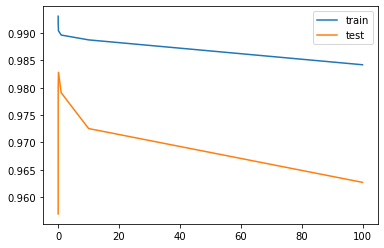

In [117]:
plt.plot(alpha_list, train_score, label = 'train')
plt.plot(alpha_list, test_score, label = 'test')
plt.legend()

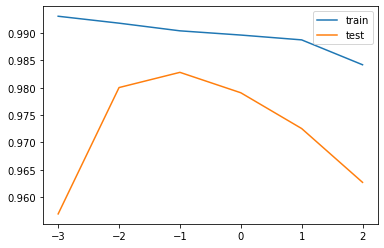

In [118]:
# alpha 값을 0.001부터 10배씩 늘렸기 때문에 alpha list에 있는 6개의 값을 동일 간격으로 나타내주려 log 를 취함
# log : 지수로 표현하기 위함.
plt.plot(np.log10(alpha_list), train_score, label = 'train')
plt.plot(np.log10(alpha_list), test_score, label = 'test')
plt.legend()


# 두 그래프가 가장 가깝고 테스트 셋의 점수가 가장 높은 값인 -1 로 최종 모델을 훈련하면 됨

In [143]:
alpha_list, len(train_score), len(test_score)

([0.001, 0.01, 0.1, 1, 10, 100], 30, 30)

In [144]:
ridge = Ridge(alpha = 0.1)
ridge = ridge.fit(train_scaled, train_target)

In [145]:
ridge

Ridge(alpha=0.1)

In [146]:
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9903815817570367, 0.9827976465386834)

In [147]:
from sklearn.linear_model import Lasso

In [148]:
lasso = Lasso()

In [149]:
lasso.fit(train_scaled, train_target)

Lasso()

In [150]:
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.989789897208096, 0.9800593698421883)

In [155]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score, test_score = list(), list()
for al_v in alpha_list:
    lasso = Lasso(alpha=al_v)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939808, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475122, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926333242, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


In [157]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score, test_score = list(), list()
for al_v in alpha_list:
    lasso = Lasso(alpha=al_v, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


In [158]:
len(train_score), len(test_score)

(6, 6)

In [159]:
np.log10(alpha_list)

array([-3., -2., -1.,  0.,  1.,  2.])

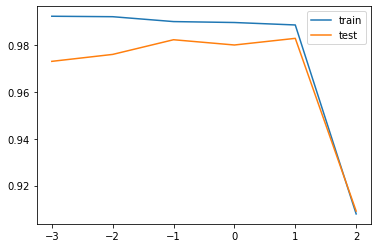

In [160]:
plt.plot(np.log10(alpha_list), train_score, label = 'train')
plt.plot(np.log10(alpha_list), test_score, label = 'test')
plt.legend()

In [161]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [162]:
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.9888067471131867, 0.9824470598706695)

In [163]:
lasso.coef_

(array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
        42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
        43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
         0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
         0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 400.8333333333333)

In [167]:
unique, counts = np.unique(lasso.coef_, return_counts=True)
np.asarray((unique, counts)).T
# 0이 40개
# 55개의 특성 중 40개의 특성은 사용되지 않음. >> 라쏘 모델을 유용한 특성을 골라낸느 용도로도 사용이 가능하다.

array([[ 0.        , 40.        ],
       [ 5.7033775 ,  1.        ],
       [ 7.42309425,  1.        ],
       [11.85823365,  1.        ],
       [12.14852453,  1.        ],
       [13.53038193,  1.        ],
       [13.70596191,  1.        ],
       [15.51272953,  1.        ],
       [15.81041778,  1.        ],
       [18.14672268,  1.        ],
       [18.66993032,  1.        ],
       [21.22111356,  1.        ],
       [42.23100799,  1.        ],
       [43.2185952 ,  1.        ],
       [47.46254536,  1.        ],
       [55.44856399,  1.        ]])